In [9]:
import timeit
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

from skimage.filters import sobel
import pyclesperanto_prototype as prototype
from pyclesperanto import cle

cle.set_wait_for_kernel_to_finish(True)

prototype.select_device()
prototype.set_wait_for_kernel_finish(True)

sizes = [128, 256, 512, 1024, 2048, 4096, 8192]

warmup_iter = 3
eval_iter = 5

In [10]:
def benchmark_function(target_function):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    benchmark_data = []
    for size in sizes:
        # make new data
        image = np.random.rand(size, size)
        # bind target function to given image
        partial_function = partial(target_function, image)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=warmup_iter)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=eval_iter)
        # store results
        benchmark_data.append([size*4, time_in_s])
    return np.asarray(benchmark_data)

# Gaussian Blur

### pyclesperanto-prototype

In [11]:
def prototype_function(image):
    prototype.sobel(source=image)

In [12]:
prototype_benchmark_data = benchmark_function(prototype_function)

### pyclesperanto

In [13]:
def pyclic_function(image):
    cle.sobel(input_image=image)

In [14]:
pyclic_benchmark_data = benchmark_function(pyclic_function)

### Skimage

In [15]:
def skimage_function(image):
    sobel(image)

In [16]:
skimage_benchmark_data = benchmark_function(skimage_function)

## Results

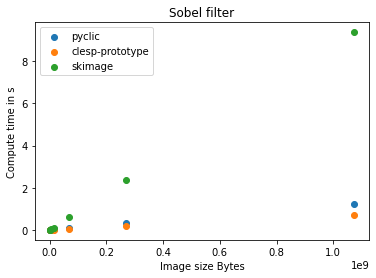

In [17]:
plt.scatter(pyclic_benchmark_data[:,0] ** 2, pyclic_benchmark_data[:,1])
plt.scatter(prototype_benchmark_data[:,0] ** 2, prototype_benchmark_data[:,1])
plt.scatter(skimage_benchmark_data[:,0] ** 2, skimage_benchmark_data[:,1])

plt.legend(["pyclic", "clesp-prototype", "skimage"])
plt.xlabel("Image size Bytes")
plt.ylabel("Compute time in s")
plt.title("Sobel filter")
plt.show()